In [1]:
import numpy as np
from matplotlib import pyplot as plt
from src.FireFramework import * # importieren des Frameworks
from PIL import Image

## Hilfsfunktionen

In [6]:
def drawImage(field, index):
    plt.imshow(np.stack([field[index,:,:,1],field[index,:,:,0],np.zeros(shape = (field.shape[1], field.shape[2]))], axis = 2))

In [8]:
def loadImage(path, cropsection, size):
    img_ = Image.open(path).convert('RGB').crop(cropsection).resize(size, Image.NEAREST) # Rezisemethode nicht ändern
    img = np.array(img_)
    img_.close()
    return img

In [10]:
def loadFuelmap(path, cropsection, size):
# Erzeugt Fuelmap aus Kartenmaterial der ESA
# path: Pfad zum Kartenmaterial
# area: Bildausschnitt (links, oben, rechts, unten)
# size: Auflösung der Fuelmap (x,y)

    # Lädt Bild & konvertiert in Array
    img = loadImage(path, cropsection, size)
    plt.imshow(img) # Optional zur Überprüfung

    # Farben des Kartenmaterials zu Brennwerten
    # HIER VERSCHIEDENE BRENNWERTE EINSETZEN & AUSPROBIEREN
    lookupfuel = {
        #Tree Cover
        (0,100,0): 0.8,
        #Shrubland
        (255,187,34): 0.6,
        #Grassland
        (255,255,76): 0.4,
        #Cropland
        (240,150,255): 0.6,
        #Built-up
        (250,0,0): 0.3,
        #Bare/sparse vegetation
        (180,180,180): 0.2,
        #Snow and Ice
        (240,240,240): 0,
        #Permanent water bodies
        (0,100,200): 0,
        #Herbaceous wetland
        (0,150,160): 0.1,
        #Mangroves
        (0,207,117): 0.1,
        #Moss and lichen
        (250,230,160): 0.1,
    }

    fuelmap = np.zeros(size)
    
    # Konvertiert Karte zu Fuelmap durch Dictionary Lookup
    for i in range(size[0]):
        for j in range(size[1]):
            fuelmap[i,j] = lookupfuel.get(tuple(img[i,j]), 0)
        if(i % (size[0]/10) == 0): print(100 * i / size[0], "%") # Ladebalken

    return fuelmap

## Feld initialisieren & Fuelmap laden

0.0 %
10.0 %
20.0 %
30.0 %
40.0 %
50.0 %
60.0 %
70.0 %
80.0 %
90.0 %


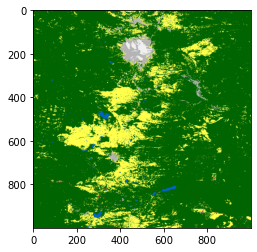

In [16]:
# Liste der pro Zelle zu speichernden Werte
params = ["fuel","fire"]

# Relativvektoren der zu betrachtenen Nachbarn
relative_neighbours = [(-1,0),(1,0),(0,1),(0,-1),(-1,1),(1,1),(-1,-1),(1,-1)] 


# Ein Startfeld (Zeile, Spalte) -> liste.
# Liefert die Anfangsparameter (Reihenfolge wie oben in "params" spezifiziert)
def initial_field(row, col):
    
    fuel = fuelmap[row, col]
    burn = 0
    if row == 140 and col == 30: burn = 1
    
    return [fuel, burn] # Hier der Anfangswert-return

def transition(cellState, neighbourStates, returnState):
    #Beispiel
    p_burn = 1/8 * sum([n.getParam("fire") for n in neighbourStates]) #Anteil der brennenden Nachbarzellen
    p_stop = (1 - cellState.getParam("fuel")) ** 8  #Erlöschen bei wenig Brennwert
    
    if p_burn >= np.random.uniform():
        returnState.setParam("fire", 1)
        
    if p_stop >= np.random.uniform():
        returnState.setParam("fire", 0)
        
    returnState.addToParam("fuel", -0.01*cellState.getParam("fire")) # Verringerung des Brennwerts

# Hier wird die Fuelmap aus dem Bild der Karte erzeugt
fuelmap = loadFuelmap('Kartenmaterial/Oregon.tif', (0,0,4815,4815), (1000,1000))
    
# Hier wird das Gitter erzeugt und die oben definierten Parameter übergeben
# Gittergröße unbedingt auf Größe der Fuelmap anpassen
g = Grid(1000, 1000, params, relative_neighbours, transition, initial_field)

## Simulation starten

In [24]:
# Läuft N Iterationen durch und gibt das ganze Feld (mit zeitlicher Entwicklung) zurück.
N = 10
result = g.runModel(N)

ZeroDivisionError: integer division or modulo by zero

In [22]:
drawImage(result, 1)

NameError: name 'result' is not defined